#### Explorative analysis of condition of bridges (Zustandsnote)

This script is used to produce plots of the `Zustandsnote` to get a better feeling on how it is distributed and how different it is. 

Feel free to add further cells and analysis. 

In [13]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# read data
data = pd.read_csv('../data/reduced_bridge_statistic_germany.csv', sep=';')

# remove bridges that were built before 1800
data = data[data['Baujahr Überbau'] >= 1800]

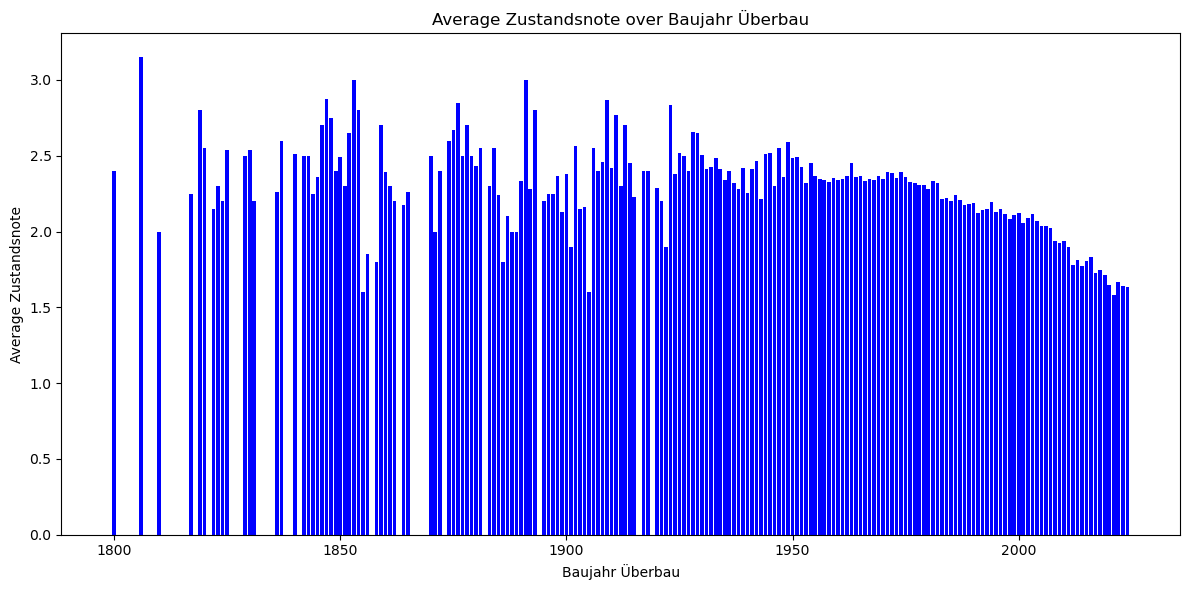

In [29]:
# plot average condition over years as bar chart
condition = data.groupby(['Baujahr Überbau'])['Zustandsnote'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.bar(condition['Baujahr Überbau'], condition['Zustandsnote'], color='blue')
plt.xlabel('Baujahr Überbau')       
plt.ylabel('Average Zustandsnote')
plt.title('Average Zustandsnote over Baujahr Überbau')
plt.tight_layout()
plt.show()

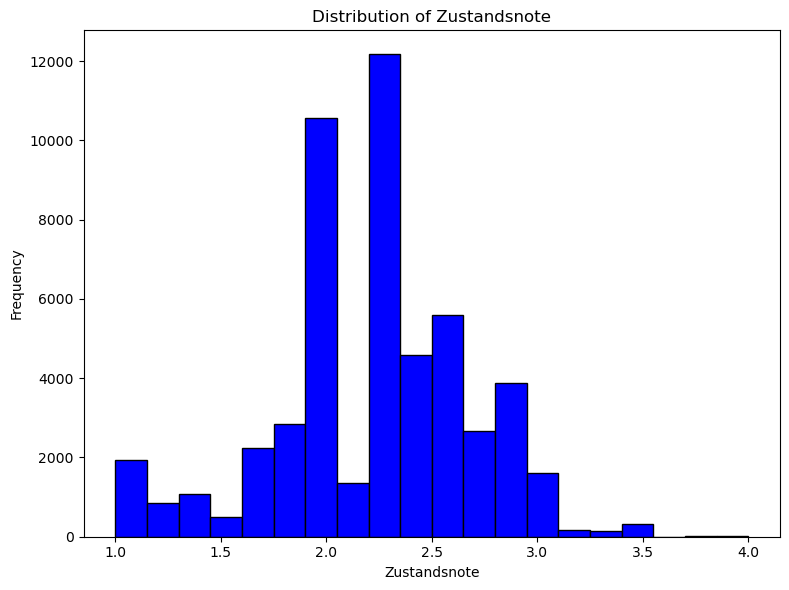

In [30]:
# plot histogram of condition
plt.figure(figsize=(8,6))
plt.hist(data['Zustandsnote'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Zustandsnote')
plt.ylabel('Frequency')
plt.title('Distribution of Zustandsnote')
plt.tight_layout()
plt.show()

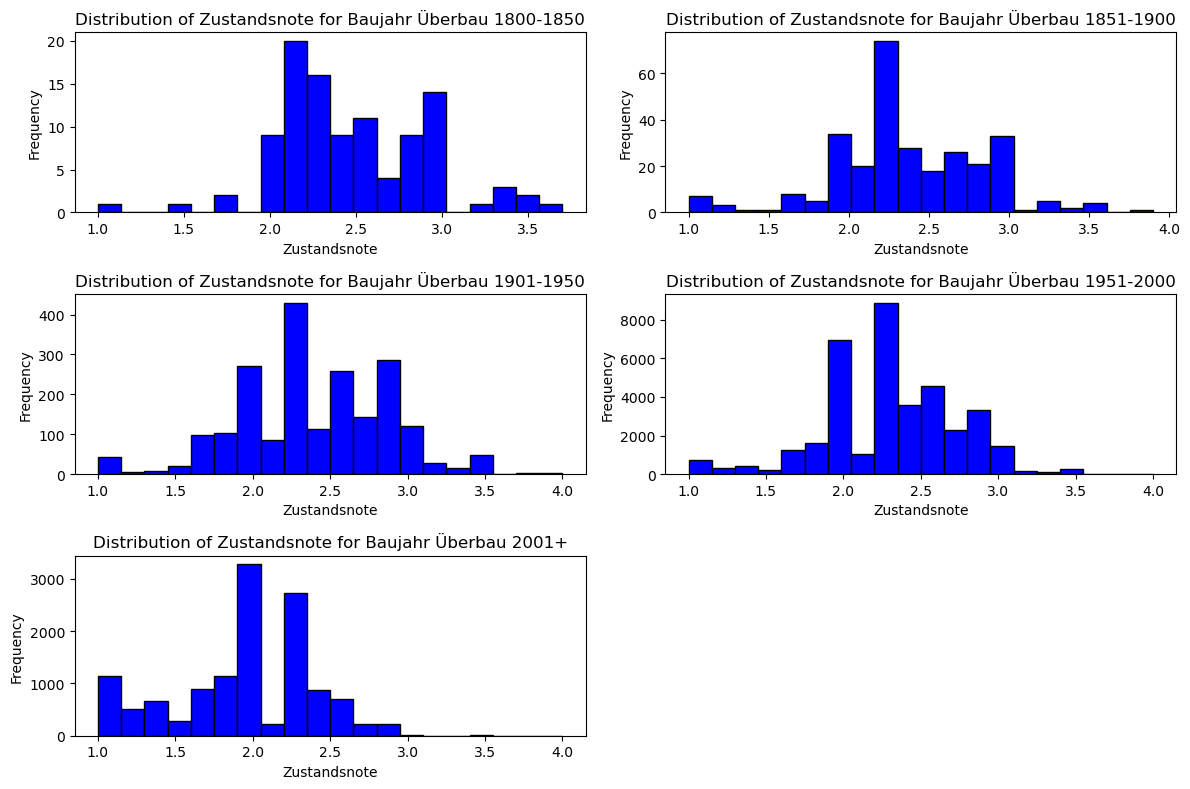

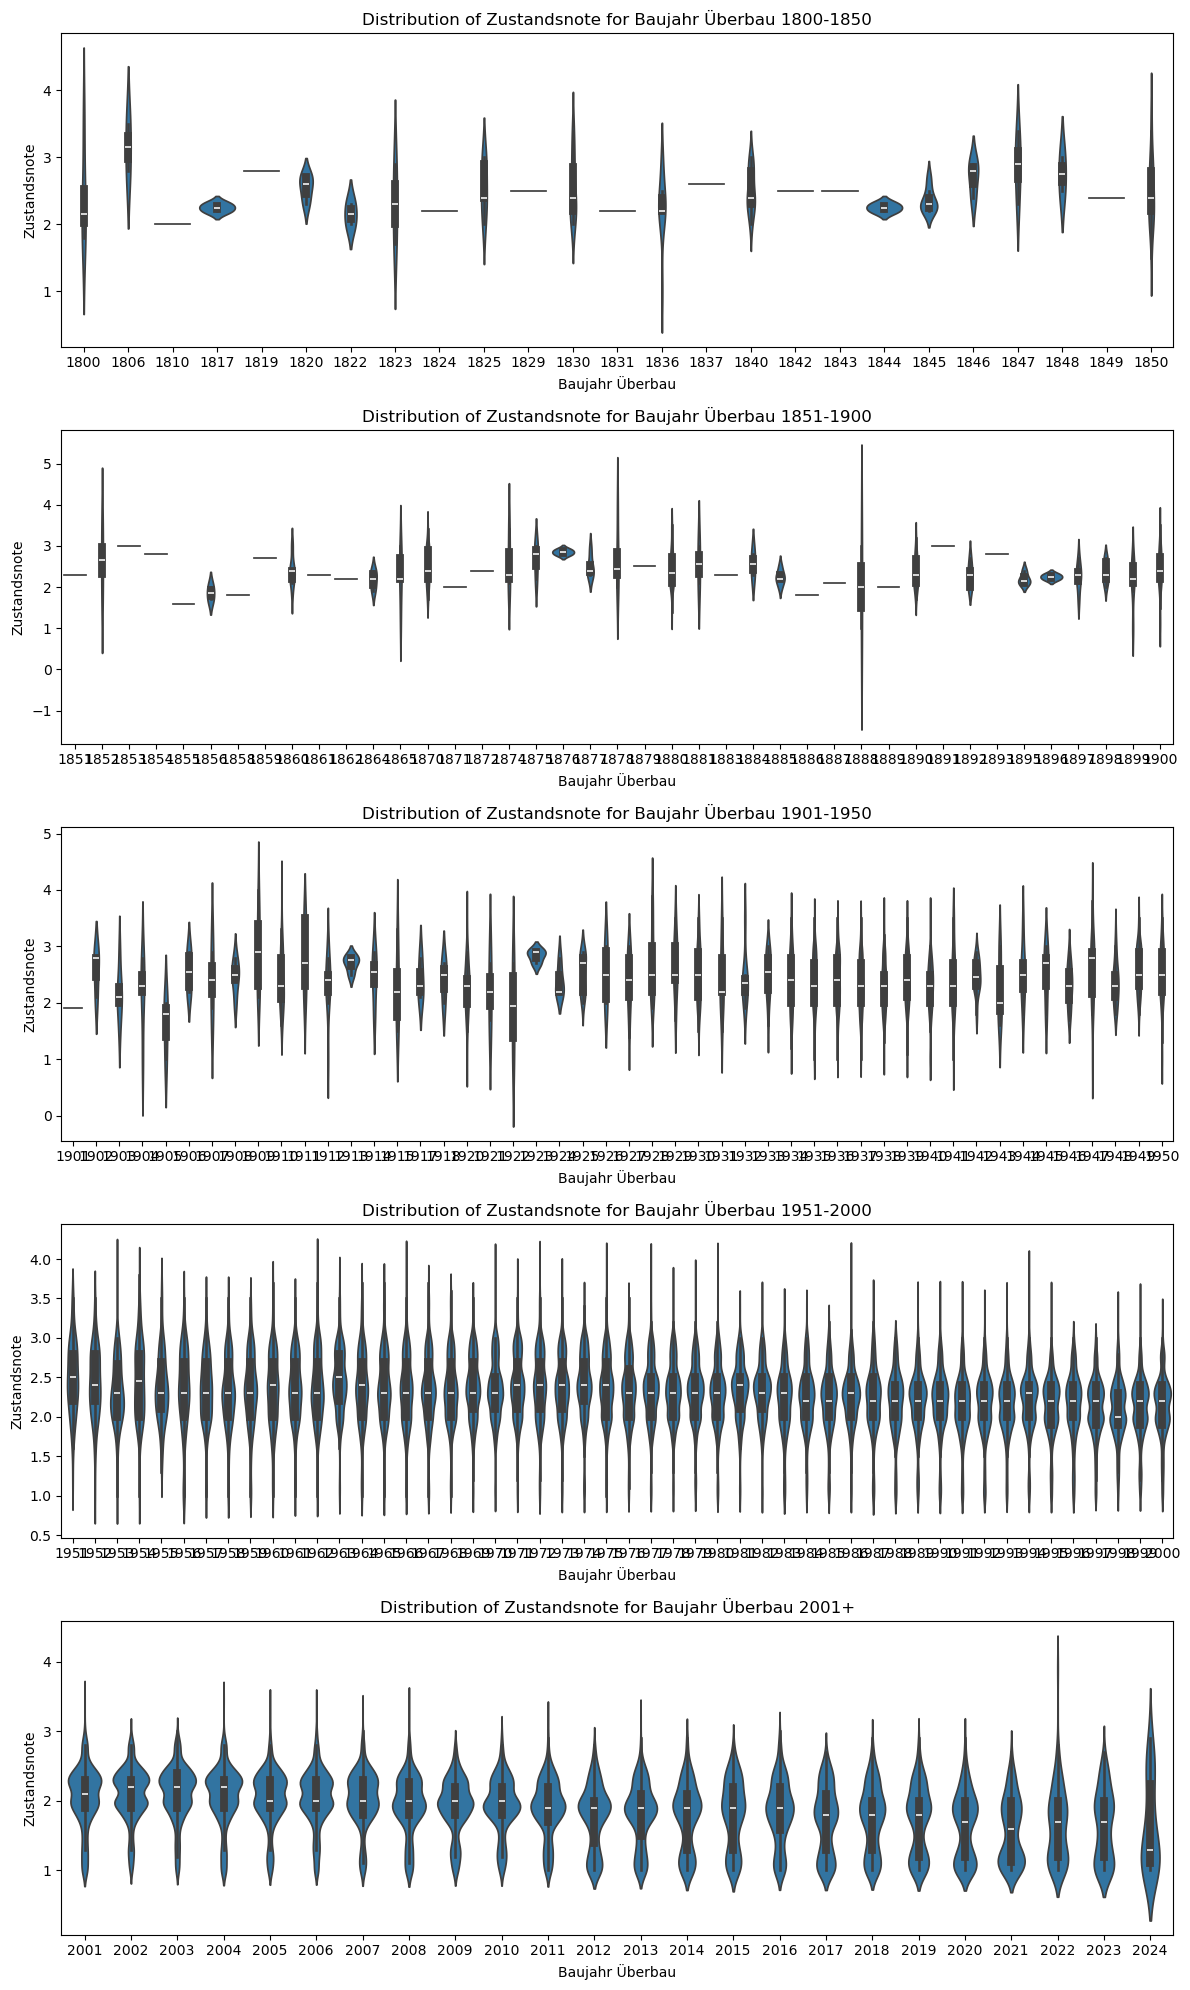

In [54]:
# bin data by year of construction
data_1800 = data[(data['Baujahr Überbau'] <= 1850) & (data['Baujahr Überbau'] >= 1800)]
data_1851 = data[(data['Baujahr Überbau'] > 1850) & (data['Baujahr Überbau'] <= 1900)]
data_1901 = data[(data['Baujahr Überbau'] > 1900) & (data['Baujahr Überbau'] <= 1950)]
data_1951 = data[(data['Baujahr Überbau'] > 1950) & (data['Baujahr Überbau'] <= 2000)]
data_2001 = data[data['Baujahr Überbau'] > 2000]

# for each dataset print the distribution of the conditions (histogram)
datasets = [data_1800, data_1851, data_1901, data_1951, data_2001]
labels = ['1800-1850', '1851-1900', '1901-1950', '1951-2000', '2001+']
plt.figure(figsize=(12,8))
for i, dataset in enumerate(datasets):
    plt.subplot(3,2,i+1)
    plt.hist(dataset['Zustandsnote'], bins=20, color='blue', edgecolor='black')
    plt.xlabel('Zustandsnote')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Zustandsnote for Baujahr Überbau {labels[i]}')
    plt.tight_layout()
plt.show()

# for each dataset print the distribution of conditions per year of construction as violine plots
plt.figure(figsize=(12,20))
for i, dataset in enumerate(datasets):
    plt.subplot(5,1,i+1)
    sns.violinplot(x='Baujahr Überbau', y='Zustandsnote', data=dataset)
    plt.xlabel('Baujahr Überbau')
    plt.ylabel('Zustandsnote')
    plt.title(f'Distribution of Zustandsnote for Baujahr Überbau {labels[i]}')
    plt.tight_layout()
plt.show()

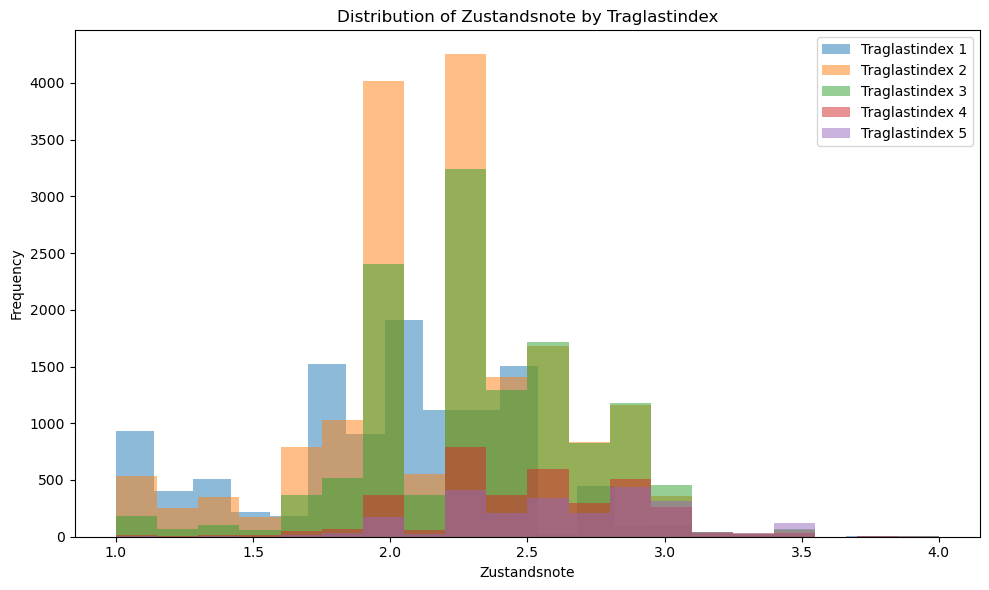

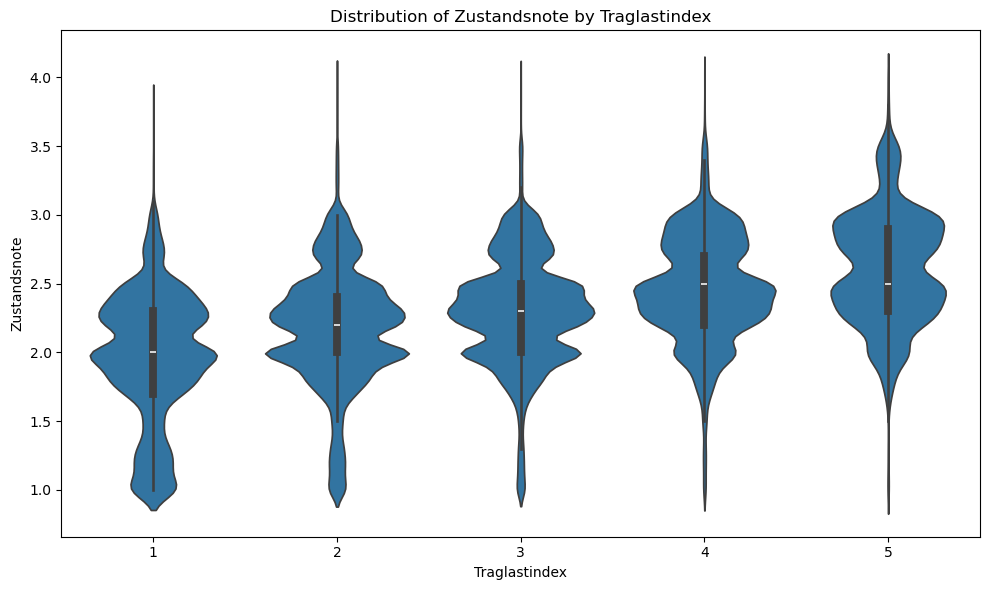

In [55]:
# exclude rows with missing Traglastindex or undifined Traglastindex
data_plot_index = data[data['Traglastindex'].isin([1,2,3,4,5])]

# plot distribution of condition by Traglastindex
plt.figure(figsize=(10,6))
for index in sorted(data_plot_index['Traglastindex'].unique()):
    subset = data_plot_index[data_plot_index['Traglastindex'] == index]
    plt.hist(subset['Zustandsnote'], bins=20, alpha=0.5, label=f'Traglastindex {index}')
plt.xlabel('Zustandsnote')
plt.ylabel('Frequency')
plt.title('Distribution of Zustandsnote by Traglastindex')
plt.legend()
plt.tight_layout()
plt.show()

# plot as violine plots (y = Zustandsnote, x = Traglastindex)
plt.figure(figsize=(10,6))
sns.violinplot(x='Traglastindex', y='Zustandsnote', data=data_plot_index)
plt.xlabel('Traglastindex')
plt.ylabel('Zustandsnote')
plt.title('Distribution of Zustandsnote by Traglastindex')  
plt.tight_layout()
plt.show()


It seems like that there is a small trend of the mean of the violine plots increasing with increased `Traglastindex`. It could be interesting to look at this relationship further. 

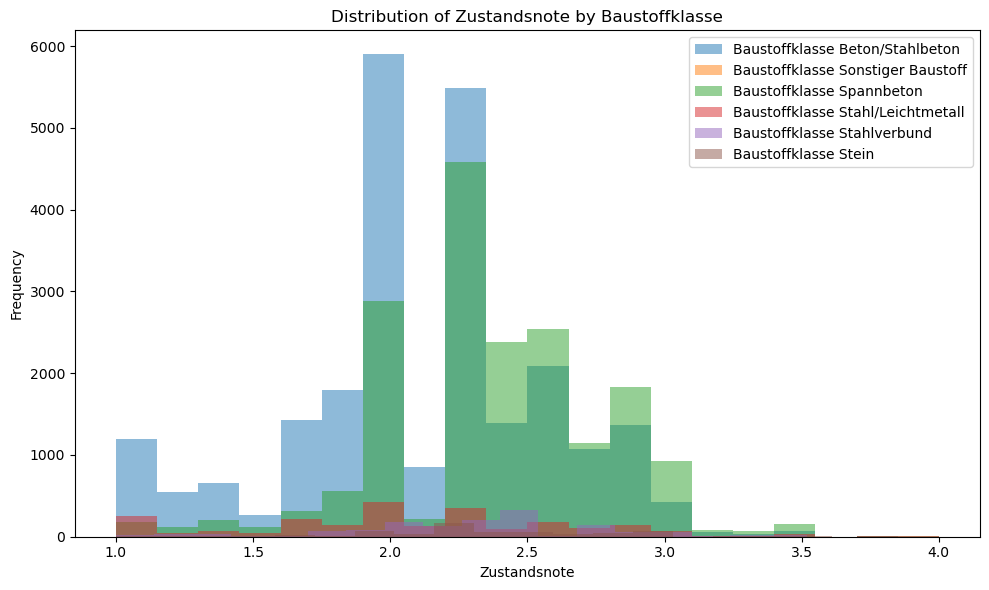

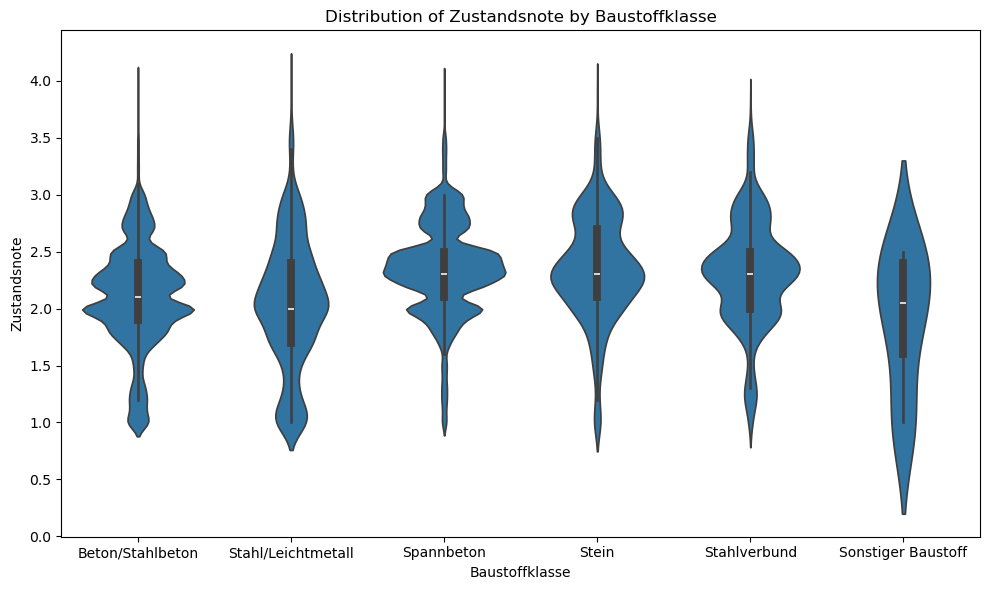

In [56]:
# plot distribution of condition by Baustoffklasse
plt.figure(figsize=(10,6))
for index in sorted(data_plot_index['Baustoffklasse'].unique()):
    subset = data_plot_index[data_plot_index['Baustoffklasse'] == index]
    plt.hist(subset['Zustandsnote'], bins=20, alpha=0.5, label=f'Baustoffklasse {index}')
plt.xlabel('Zustandsnote')
plt.ylabel('Frequency')
plt.title('Distribution of Zustandsnote by Baustoffklasse')
plt.legend()
plt.tight_layout()
plt.show()

# plot as violine plots (y = Zustandsnote, x = Traglastindex)
plt.figure(figsize=(10,6))
sns.violinplot(x='Baustoffklasse', y='Zustandsnote', data=data_plot_index)
plt.xlabel('Baustoffklasse')
plt.ylabel('Zustandsnote')
plt.title('Distribution of Zustandsnote by Baustoffklasse')  
plt.tight_layout()
plt.show()
